# 🎓 Student Performance Data Analysis

This notebook presents an exploratory data analysis (EDA) of a student performance dataset. The goal is to uncover insights related to academic outcomes, study habits, motivation levels, and demographic factors.

### 🔍 Objectives:
- Clean and prepare the dataset by handling missing values
- Understand the distribution of exam scores
- Explore relationships between exam performance and categorical features such as:
  - Gender
  - Motivation level
  - Parental education
  - Study hours
- Use visualizations and statistical summaries to guide insights
- Identify key factors that may influence student achievement

The analysis uses Python libraries like `pandas`, `matplotlib`, and `seaborn`, and follows a clear, organized EDA process suitable for educational or freelance reporting.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

        
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [3]:
df= pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 🧹 Data Cleaning

We'll make column names lowercase and consistent, and check for missing or incorrect values.


In [5]:
#inspecting and cleaning dataframe structure
#dataframe summery
def summery(df):
    print(f'data shape: {df.shape}')
    summ= pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing#']= df.isna().sum()
    summ['mispercent']= (df.isna().sum())/ len(df)
    summ['dups']= df.duplicated().sum()
    summ['uniques']= df.nunique().values
    summ['count']= df.count().values

    desc= pd.DataFrame(df.describe(include='all').transpose())
    summ['min']= desc['min'].values
    summ['max']= desc['max'].values
    summ['average']= desc['mean'].values
    summ['standaard deviation']= desc['std'].values
    summ['first value']= df.loc[0].values
    summ['second value']= df.loc[1].values
    summ['third value']= df.loc[2].values
    display(summ)
    return summ
summery_1= summery(df)
print('\n')
print(summery_1)

data shape: (6607, 20)


,data type,missing#,mispercent,dups,uniques,count,min,max,average,standaard deviation,first value,second value,third value
Hours_Studied,int64,0,0.000000,0,41,6607,1.0,44.0,19.975329,5.990594,23,19,24
Attendance,int64,0,0.000000,0,41,6607,60.0,100.0,79.977448,11.547475,84,64,98
Parental_Involvement,object,0,0.000000,0,3,6607,NaN,NaN,NaN,NaN,Low,Low,Medium
Access_to_Resources,object,0,0.000000,0,3,6607,NaN,NaN,NaN,NaN,High,Medium,Medium
Extracurricular_Activities,object,0,0.000000,0,2,6607,NaN,NaN,NaN,NaN,No,No,Yes
Sleep_Hours,int64,0,0.000000,0,7,6607,4.0,10.0,7.02906,1.46812,7,8,7
Previous_Scores,int64,0,0.000000,0,51,6607,50.0,100.0,75.070531,14.399784,73,59,91
Motivation_Level,object,0,0.000000,0,3,6607,NaN,NaN,NaN,NaN,Low,Low,Medium
Internet_Access,object,0,0.000000,0,2,6607,NaN,NaN,NaN,NaN,Yes,Yes,Yes
Tutoring_Sessions,int64,0,0.000000,0,9,6607,0.0,8.0,1.493719,1.23057,0,2,2




                           data type  missing#  mispercent  dups  uniques  \
Hours_Studied                  int64         0    0.000000     0       41   
Attendance                     int64         0    0.000000     0       41   
Parental_Involvement          object         0    0.000000     0        3   
Access_to_Resources           object         0    0.000000     0        3   
Extracurricular_Activities    object         0    0.000000     0        2   
Sleep_Hours                    int64         0    0.000000     0        7   
Previous_Scores                int64         0    0.000000     0       51   
Motivation_Level              object         0    0.000000     0        3   
Internet_Access               object         0    0.000000     0        2   
Tutoring_Sessions              int64         0    0.000000     0        9   
Family_Income                 object         0    0.000000     0        3   
Teacher_Quality               object        78    0.011806     0        3 

In [6]:
# cover columnsto lowercase:
df.columns= df.columns.str.lower()
df.columns


    

Index(['hours_studied', 'attendance', 'parental_involvement',
       'access_to_resources', 'extracurricular_activities', 'sleep_hours',
       'previous_scores', 'motivation_level', 'internet_access',
       'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type',
       'peer_influence', 'physical_activity', 'learning_disabilities',
       'parental_education_level', 'distance_from_home', 'gender',
       'exam_score'],
      dtype='object')

In [7]:
df.shape

(6607, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hours_studied               6607 non-null   int64 
 1   attendance                  6607 non-null   int64 
 2   parental_involvement        6607 non-null   object
 3   access_to_resources         6607 non-null   object
 4   extracurricular_activities  6607 non-null   object
 5   sleep_hours                 6607 non-null   int64 
 6   previous_scores             6607 non-null   int64 
 7   motivation_level            6607 non-null   object
 8   internet_access             6607 non-null   object
 9   tutoring_sessions           6607 non-null   int64 
 10  family_income               6607 non-null   object
 11  teacher_quality             6529 non-null   object
 12  school_type                 6607 non-null   object
 13  peer_influence              6607 non-null   obje

In [9]:
df.describe()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
# Describe statistices for catigorical data:
df.describe(include='object')

,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


                          Missing Values  Percentage
parental_education_level              90    1.362192
teacher_quality                       78    1.180566
distance_from_home                    67    1.014076


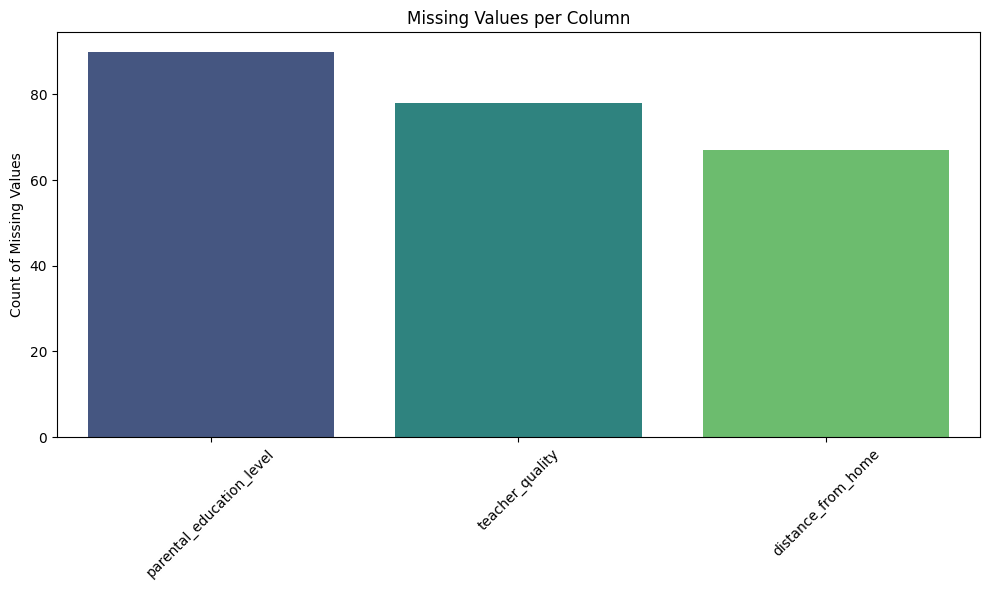

In [11]:
# Check for missing values
missing_counts = df.isnull().sum()
missing_perc = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_perc
}).sort_values(by='Missing Values', ascending=False)

# Show summary table
print(missing_df[missing_df['Missing Values'] > 0])

# 🔍 Plot missing values as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_df[missing_df['Missing Values'] > 0].index,
    y=missing_df[missing_df['Missing Values'] > 0]['Missing Values'],
    palette="viridis"
)
plt.title('Missing Values per Column')
plt.xticks(rotation=45)
plt.ylabel('Count of Missing Values')
plt.tight_layout()
plt.show()

In [12]:
# Fill missing values with the mode for selected categorical columns
categorical_cols = ['teacher_quality', 'parental_education_level', 'distance_from_home']

for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


/tmp/ipykernel_32/767052448.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [13]:
# Check if any columns still contain missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns still with missing values:", list(missing_columns))


Columns still with missing values: []


## 🔧 Handling Missing Values

Some columns in the dataset had missing values, particularly in categorical fields such as:

- `teacher_quality`
- `parental_education_level`
- `distance_from_home`

To handle this, I filled the missing values using the **mode** (most frequent value) of each column. This is a common strategy for categorical data because it preserves the distribution without introducing artificial categories.

After filling the missing values, I verified that no missing values remain in the dataset.


## 📊 Exploratory Data Analysis (EDA)

Now let's explore the data visually and statistically to uncover patterns and trends.



categorical columns are:
  ['parental_involvement', 'access_to_resources', 'extracurricular_activities', 'motivation_level', 'internet_access', 'family_income', 'teacher_quality', 'school_type', 'peer_influence', 'learning_disabilities', 'parental_education_level', 'distance_from_home', 'gender']


the unique values and value counts in parental_involvement column are:

parental_involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


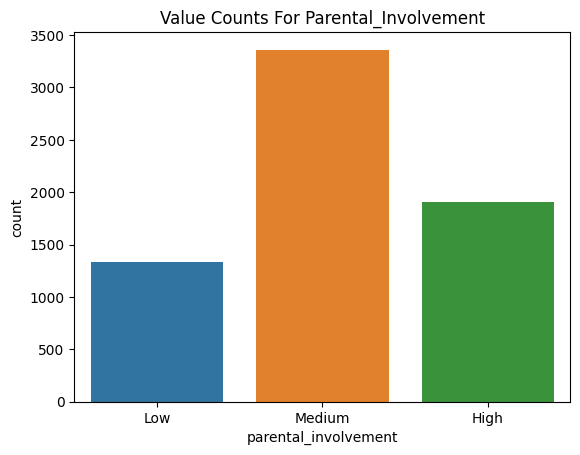

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in access_to_resources column are:

access_to_resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


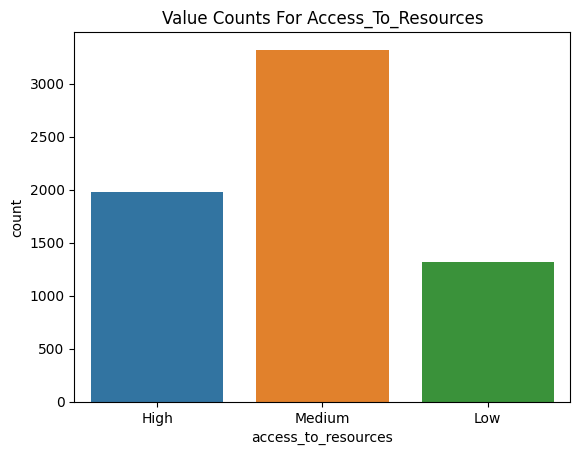

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in extracurricular_activities column are:

extracurricular_activities
Yes    3938
No     2669
Name: count, dtype: int64


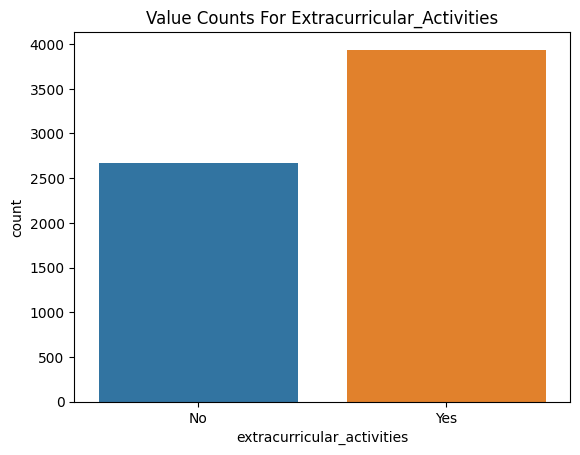

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in motivation_level column are:

motivation_level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


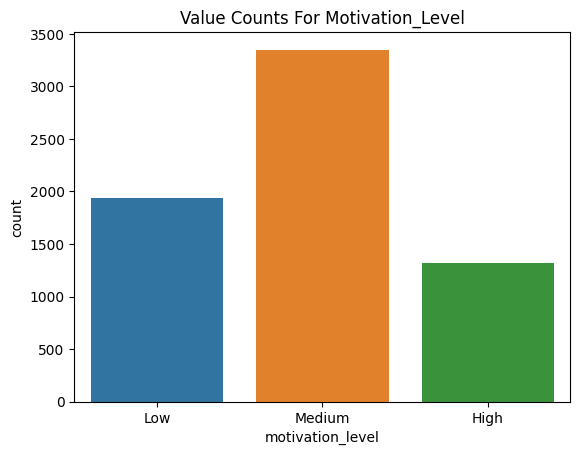

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in internet_access column are:

internet_access
Yes    6108
No      499
Name: count, dtype: int64


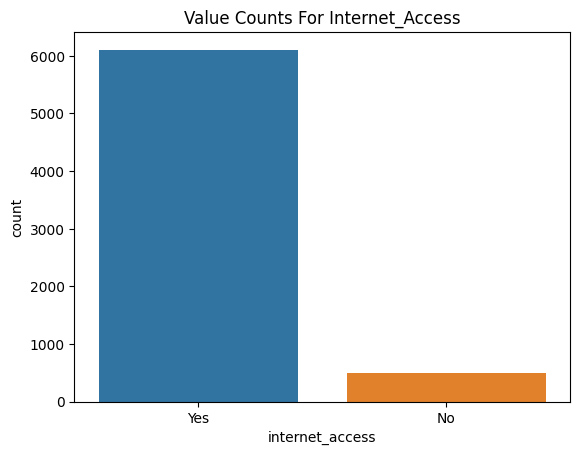

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in family_income column are:

family_income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


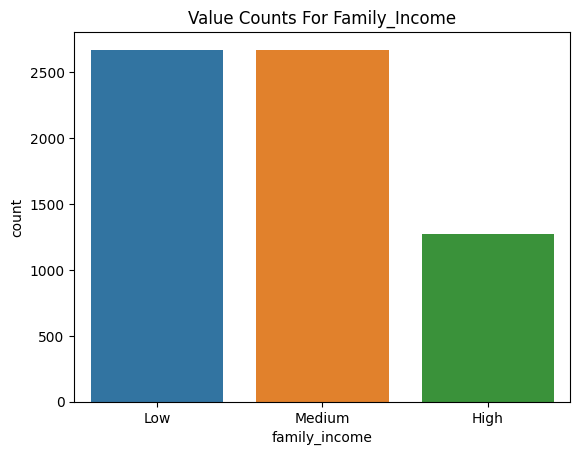

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in teacher_quality column are:

teacher_quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64


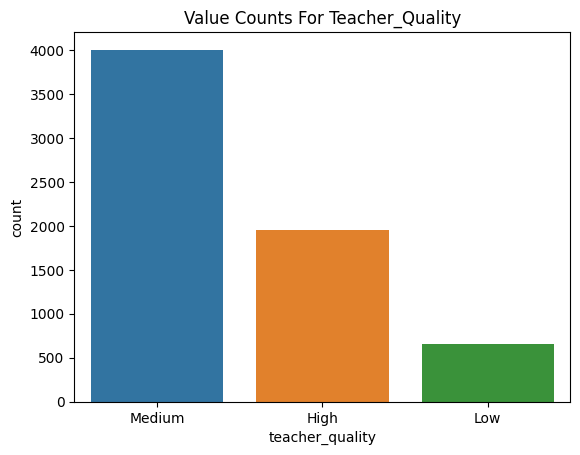

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in school_type column are:

school_type
Public     4598
Private    2009
Name: count, dtype: int64


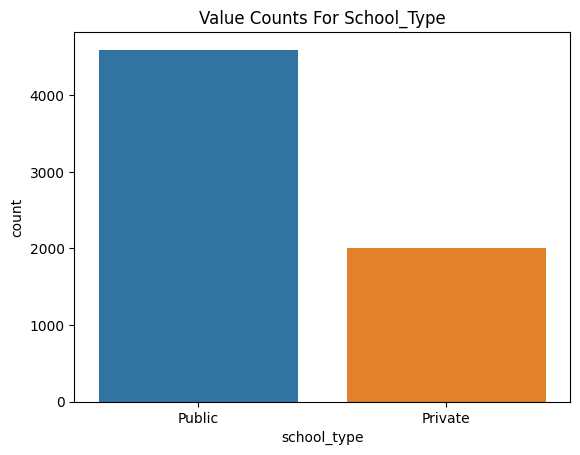

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in peer_influence column are:

peer_influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


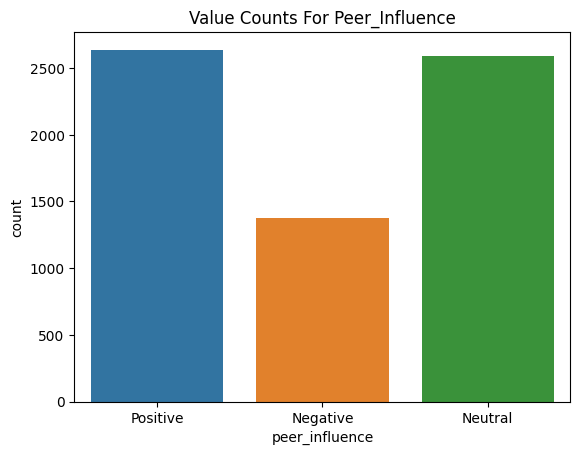

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in learning_disabilities column are:

learning_disabilities
No     5912
Yes     695
Name: count, dtype: int64


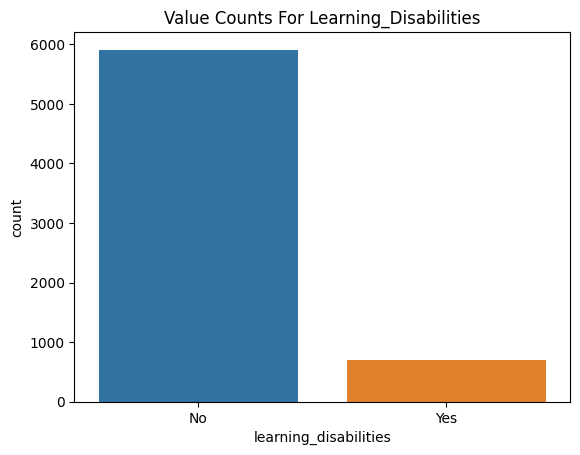

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in parental_education_level column are:

parental_education_level
High School     3313
College         1989
Postgraduate    1305
Name: count, dtype: int64


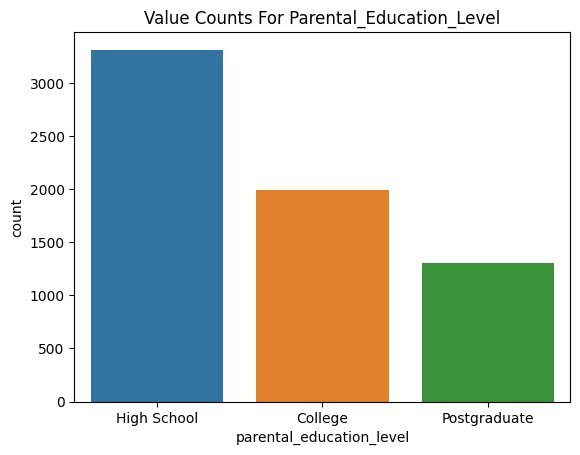

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in distance_from_home column are:

distance_from_home
Near        3951
Moderate    1998
Far          658
Name: count, dtype: int64


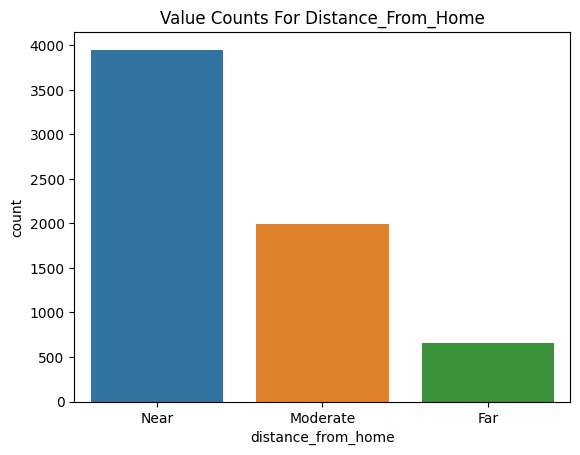

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***


the unique values and value counts in gender column are:

gender
Male      3814
Female    2793
Name: count, dtype: int64


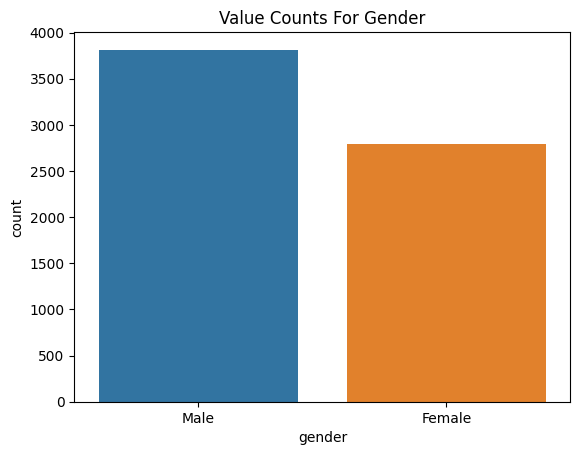

*** ****** ****** ****** ****** ****** ****** ****** ****** ****** ***




In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# identify categorical columns for object datatype
categorical_columns= [col for col in df.columns if df[col].dtype=='object']
print('\ncategorical columns are:\n ', categorical_columns)
print('\n')

# unique values and counts for each features(columns) in the dataset
for col in df.columns:
    if col in categorical_columns:
        print(f'the unique values and value counts in {col} column are:\n')
        print(df[col].value_counts())
        sns.countplot(x=df[col], data=df)
        plt.title(f'value counts for {col}'.title())
        plt.show()
        print("*** ***"*10)
        print('\n')

    

## 📊 Summary Statistics for Exam Score

Before visualizing or analyzing exam results, it's important to understand the overall distribution. Below, I calculate the **mean** and **standard deviation** of the `exam_score` column. These metrics give us a sense of the average performance and how much variation there is among students.


In [15]:
# Calculate the range of 'exam_score'(max-min)
max_score= df['exam_score'].max()
min_score= df['exam_score'].min()
score_range= max_score - min_score
print(f'range of exam_score is {score_range}')

range of exam_score is 46


In [16]:
# Calculate and disply the mean and standerd diviation of 'exam_score'
print(f" the mean of exam score is:\n {df['exam_score'].mean()},\n and the standerd diviation is:\n {df['exam_score'].std()}" )



 the mean of exam score is:
 67.23565914938702,
 and the standerd diviation is:
 3.890455781261732


The mean represents the average score of all students, while the standard deviation shows how much individual scores differ from the average. A high standard deviation would suggest more variability in student performance.

These statistics help provide context when comparing subgroups (e.g., by gender or parental education).


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


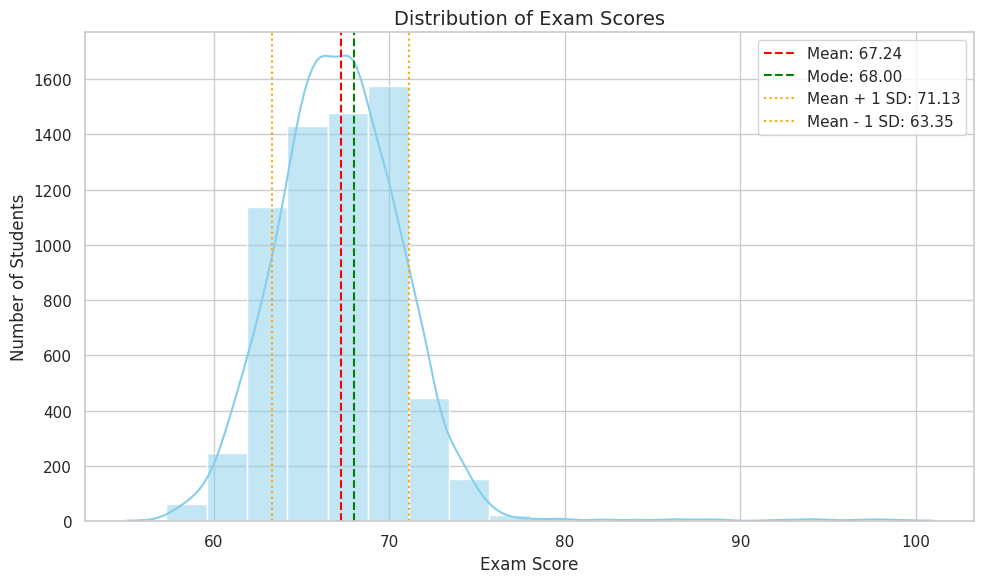

In [17]:

# Set the style
sns.set(style="whitegrid")

# Calculate stats
mean_score = df['exam_score'].mean()
std_score = df['exam_score'].std()
mode_score = df['exam_score'].mode()[0]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], bins=20, kde=True, color='skyblue')

# Plot mean, mode, and std lines
plt.axvline(mean_score, color='red', linestyle='--', label=f"Mean: {mean_score:.2f}")
plt.axvline(mode_score, color='green', linestyle='--', label=f"Mode: {mode_score:.2f}")
plt.axvline(mean_score + std_score, color='orange', linestyle=':', label=f"Mean + 1 SD: {mean_score + std_score:.2f}")
plt.axvline(mean_score - std_score, color='orange', linestyle=':', label=f"Mean - 1 SD: {mean_score - std_score:.2f}")

# Titles and labels
plt.title('Distribution of Exam Scores', fontsize=14)
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.legend()
plt.tight_layout()
plt.show()


## 📈 Exam Score Distribution

The histogram below shows how students' exam scores are distributed. I’ve added lines for:

- **Mean** (average score): 67.24
- **Mode** (most frequent score)
- **±1 Standard Deviation** (spread around the mean): ±3.89

This visualization helps us understand the concentration of student performance and how scores are spread out across the dataset.


## 📊 Visualizing Exam Performance

To better understand the distribution of student exam scores, I created a histogram that highlights key statistical measures. Visual tools like this make it easier to interpret trends and variability in the dataset.


In [18]:
# Define bins and labels
bin_edges = [55, 65, 67, 69, 101]
bin_names = ['Accept', 'Good', 'Very Good', 'Excellent']

# Create performance_level column
df['performance_level'] = pd.cut(
    df['exam_score'],
    bins=bin_edges,
    labels=bin_names,
    include_lowest=True
)

# Preview the result
df[['exam_score', 'performance_level']].head()


,exam_score,performance_level
0,67,Good
1,61,Accept
2,74,Excellent
3,71,Excellent
4,70,Excellent


## 🏷️ Categorizing Exam Scores into Performance Levels

To simplify analysis, I converted the continuous `exam_score` values into categorical performance levels using the `pd.cut()` function. The bins were defined as:

- 55–65 → Accept  
- 65–67 → Good  
- 67–69 → Very Good  
- 69–100 → Excellent

This helps us better visualize and group students by performance in later analyses.


## 👩‍🎓👨‍🎓 Performance Levels by Gender

In this chart, we examine how student performance levels vary across genders. This helps us identify whether gender is a potential factor influencing achievement outcomes.


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


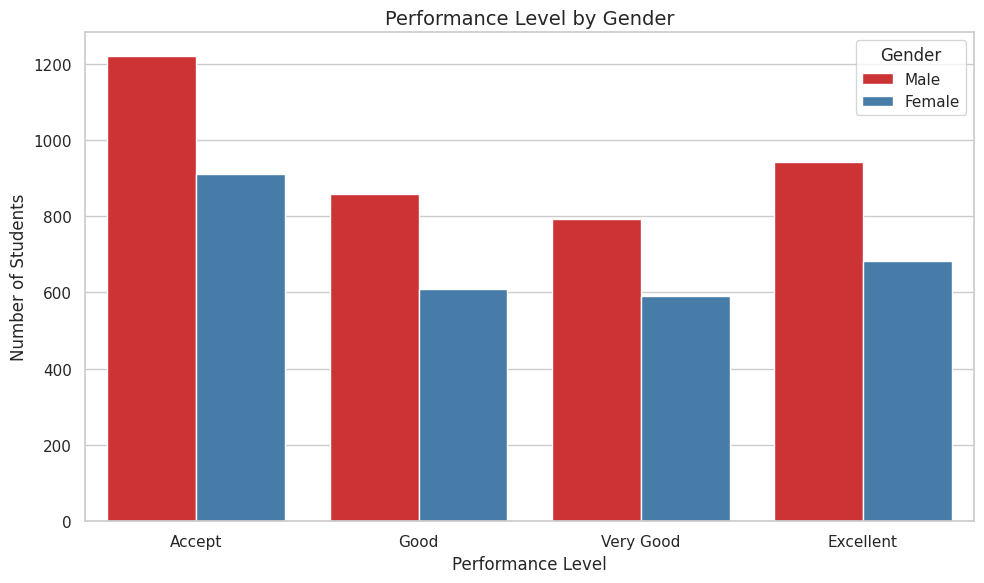

In [19]:
# 📊 How does student performance vary by gender?

plt.figure(figsize=(10, 6))
sns.countplot(x='performance_level', hue='gender', data=df, palette='Set1')

plt.title('Performance Level by Gender', fontsize=14)
plt.xlabel('Performance Level')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


From the chart, we can observe patterns in performance distribution between male and female students. This can offer useful insights for educators or program designers who want to support student success equitably.


## 🔍 Percent Distribution of Motivation Level by Performance Level
To better understand how motivation relates to academic performance, this chart shows the **percentage breakdown** of motivation levels **within each performance category**. This approach removes bias from unequal group sizes and reveals clearer trends.


/tmp/ipykernel_32/954907093.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['performance_level', 'motivation_level']).size().reset_index(name='count')
/tmp/ipykernel_32/954907093.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_performance = grouped.groupby('performance_level')['count'].transform('sum')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

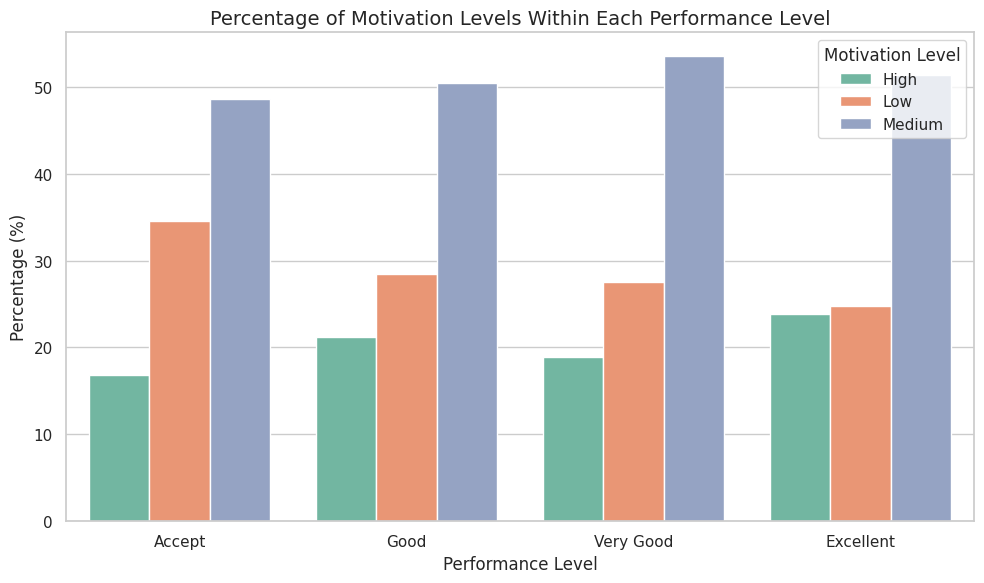

In [20]:
#The relationship between Motivation Levels and Performance Levels
# Group and count
grouped = df.groupby(['performance_level', 'motivation_level']).size().reset_index(name='count')

# Calculate total per performance level
total_performance = grouped.groupby('performance_level')['count'].transform('sum')

# Calculate percentage
grouped['percentage'] = 100 * grouped['count'] / total_performance

#  Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='performance_level',
    y='percentage',
    hue='motivation_level',
    palette='Set2'
)

plt.title('Percentage of Motivation Levels Within Each Performance Level', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Performance Level')
plt.legend(title='Motivation Level')
plt.tight_layout()
plt.show()


## ⚖️ Is there a significant difference in exam scores based on gender?

To determine whether gender has a statistically significant effect on student exam scores, I performed the following steps:

1. Separated exam scores into male and female groups.
2. Tested each group for normality using the **Shapiro-Wilk test**.
3. Based on the normality results:
   - If both groups are normally distributed, used a **two-sample t-test**.
   - Otherwise, used the **Mann–Whitney U test**, a non-parametric alternative.
4. Interpreted the **p-value** at a significance level of **0.05**.

This approach ensures the statistical test is appropriate for the data distribution.


In [21]:
#Is there a significant difference in exam scores based on gender?

import pandas as pd
!pip install scipy statsmodels
from scipy import stats

In [22]:
#seperate the score based on gender
male_scores= df.query('gender == "Male"')['exam_score']
female_scores= df[df['gender']=='Female']['exam_score']
# chek fro normality(option)
p_value_male= stats.shapiro(male_scores)
p_value_female= stats.shapiro(female_scores)
# Choosing the test based on normality:
if p_value_male.pvalue > 0.05 and p_value_female.pvalue > 0.05:
    # both groups are normality distributed, use t_test
    t_statistic, p_value= stats.ttest_ind(male_scores, female_scores)
else:
    t_statistic, p_value= stats.mannwhitneyu(male_scores, female_scores)
    #print(result)
    print(f'test statistic : {t_statistic if "t_statistic in locals()" else u_statistic}')
    print(f'p value: {p_value}')
#determine significance:
alpha= 0.05
if p_value < alpha:
   print(' there is asignificance in exam score between gender')
else:     
   print(' there is no significance in exam score between gender')
     

test statistic : 5372067.5
p value: 0.5481442905111631
 there is no significance in exam score between gender


### 📌 Interpretation

Based on the statistical test:

- **Test statistic**: 5,372,067.5  
- **p-value**: 0.548  
- **Significance level (α)**: 0.05

Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**.  
This means that there is **no statistically significant difference** in exam scores between male and female students in this dataset.

In other words, gender does not appear to be a determining factor in overall student performance based on the exam scores available.


## 🧭 Exploring Exam Score Differences by Gender Using Visualizations

To understand whether gender influences exam scores, I used visualizations to compare performance between male and female students. This includes:

- **Histograms** to see the overall shape of score distributions
- **Boxplots and violinplots** to compare the distribution and central tendency of scores


These visual tools provide intuitive insights into performance differences between genders and help reveal patterns such as score spread, outliers, or group tendencies — even without formal statistical testing.


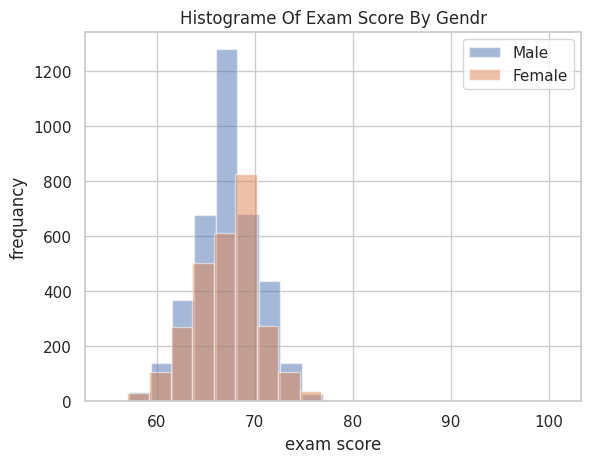

In [23]:
# Investigate differences between gender and exam score in  several ways:
# by histograms
plt.hist(df.query('gender == "Male"')['exam_score'], alpha=.5, label='Male', bins=20)
plt.hist(df.query('gender == "Female"')['exam_score'], alpha=0.5, label='Female',bins=20 )
plt.legend(loc='upper right')
plt.title('histograme of exam score by gendr'.title())
plt.xlabel('exam score')
plt.ylabel('frequancy')
plt.show();

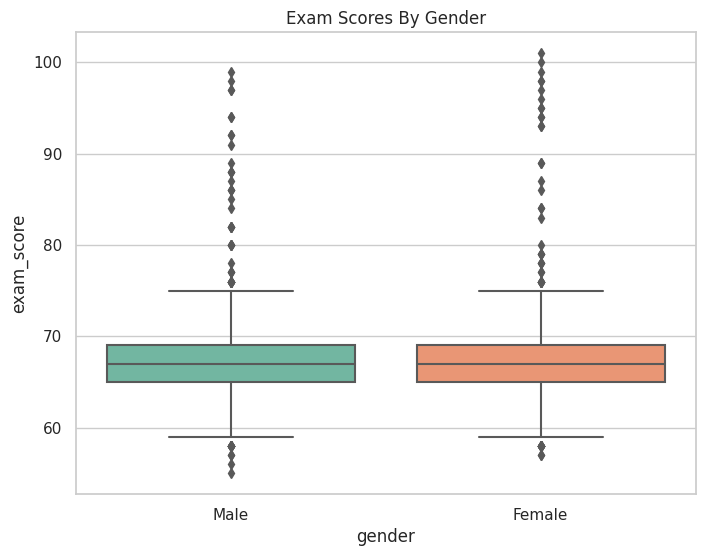

In [24]:
#by boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='exam_score', data=df, palette='Set2')
plt.title('exam scores by gender'.title())
plt.show();

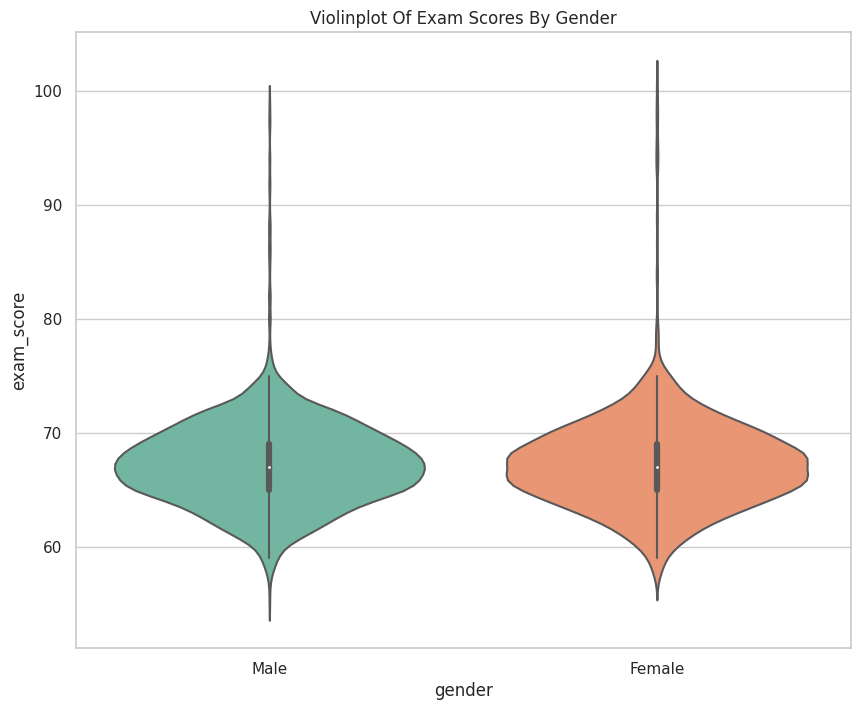

In [25]:
# by violinplot
plt.figure(figsize=(10,8))
sns.violinplot(x='gender', y= 'exam_score', data= df, palette='Set2')
plt.title('violinplot of exam scores by gender'.title())
plt.show();

## 📚 Relationship Between Study Time and Exam Score by Gender

In this visualization, I examine how the number of hours studied relates to exam performance, and whether this relationship differs between male and female students. 

A scatterplot helps identify patterns, trends, and possible gender-based differences in how study time translates to exam results.


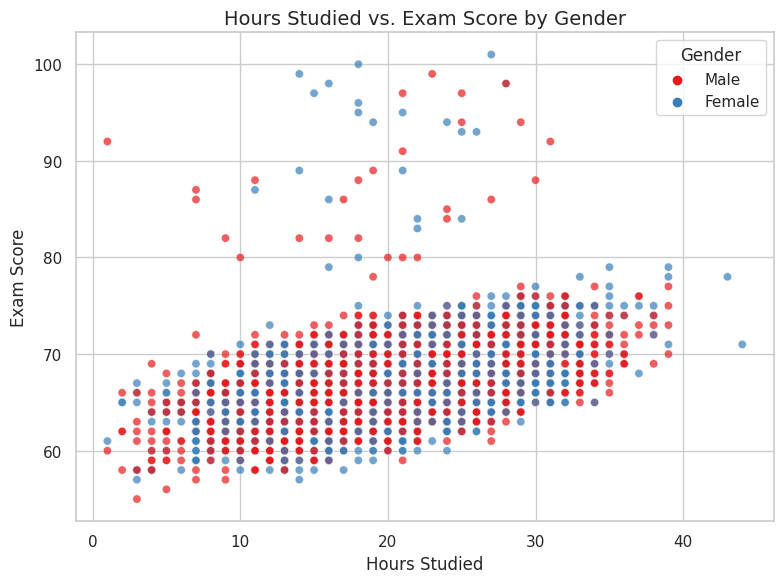

In [26]:
# 📈 Scatterplot: Hours Studied vs. Exam Score by Gender

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='hours_studied',
    y='exam_score',
    hue='gender',
    data=df,
    palette='Set1',
    alpha=0.7,
    edgecolor='w'
)

plt.title('Hours Studied vs. Exam Score by Gender', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


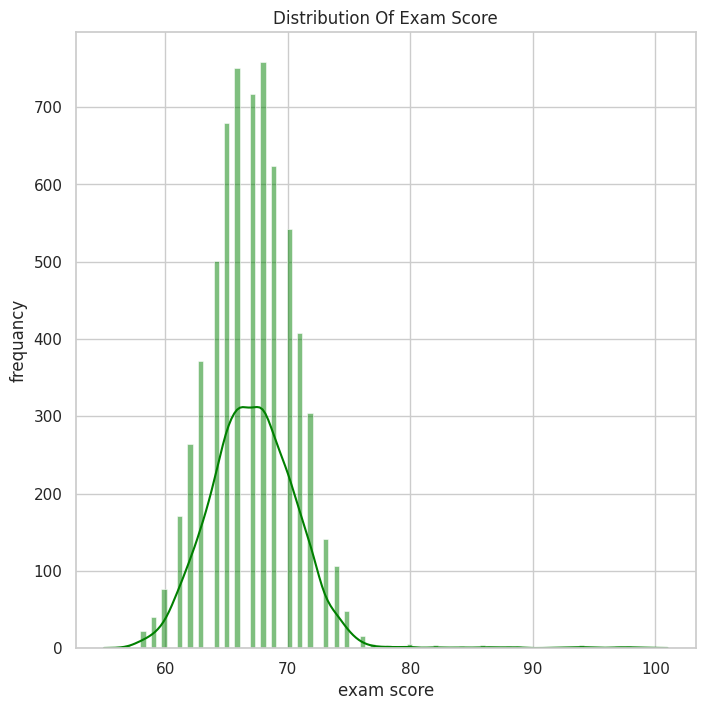

In [27]:
#Histogrames showing the distribution of exam scores with a KDA (Kernal Density Estimate) for smoothing
plt.figure(figsize=(8,8))
sns.histplot(df['exam_score'], kde=True, color='green')
plt.title('distribution of exam score'.title())
plt.xlabel('exam score')
plt.ylabel('frequancy')
plt.show();

## 📊 Visualizing Categorical Features vs. Exam Score

To better understand how different categorical variables impact student exam scores, I created three types of plots for each:

1. **Boxplot** – shows the distribution and spread of exam scores by category.
2. **Strip plot** – displays individual data points to reveal clustering or outliers.
3. **Count plot** – visualizes the frequency of each category to understand sample distribution.

This multi-view approach allows us to see both trends and distributional patterns clearly.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


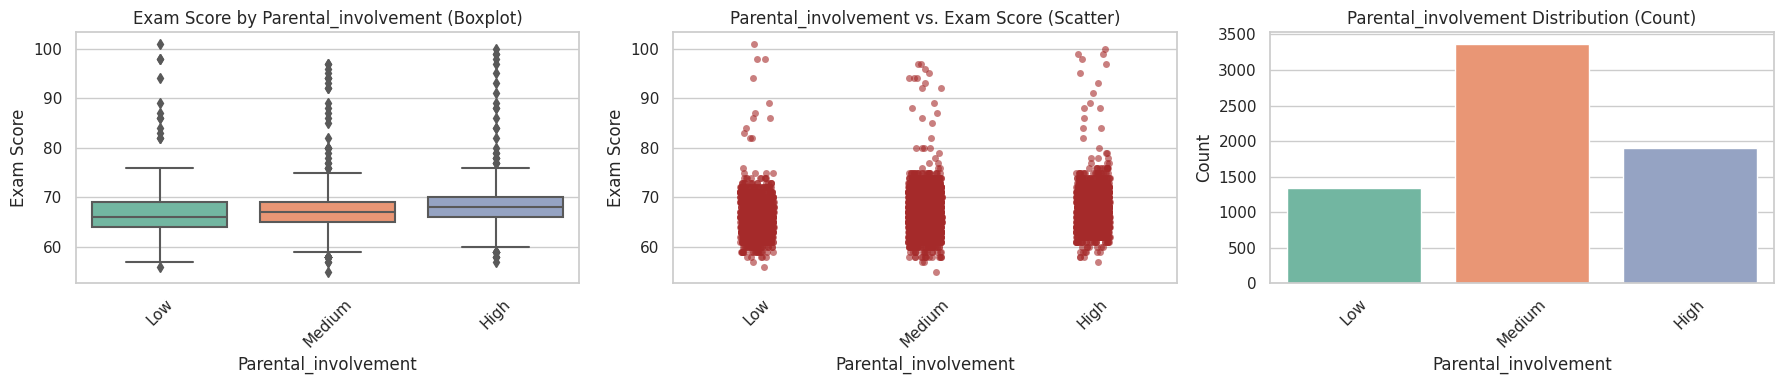

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


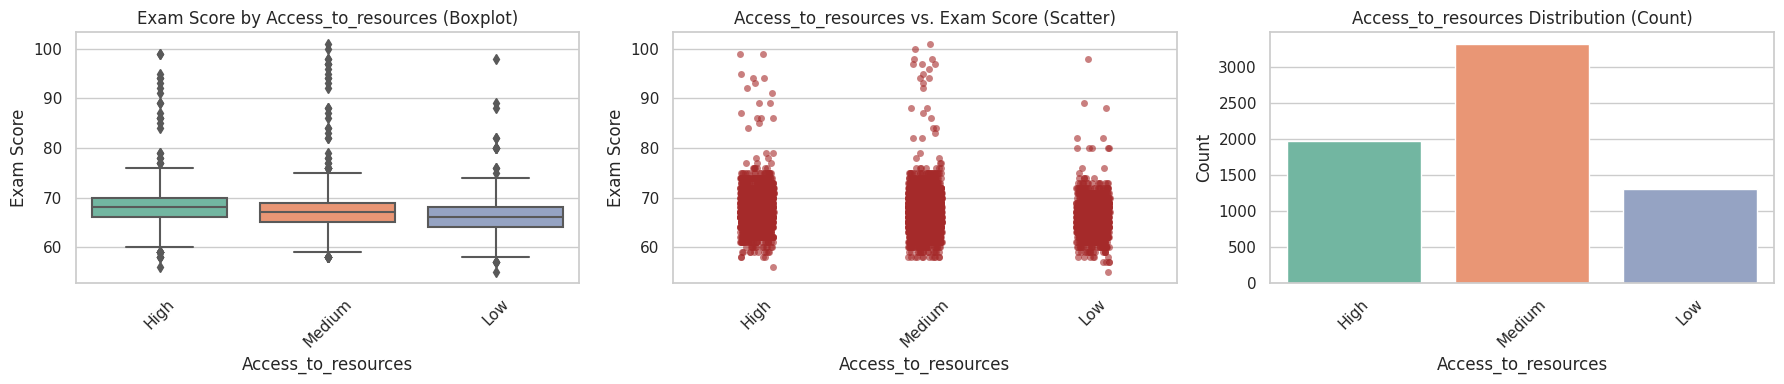

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


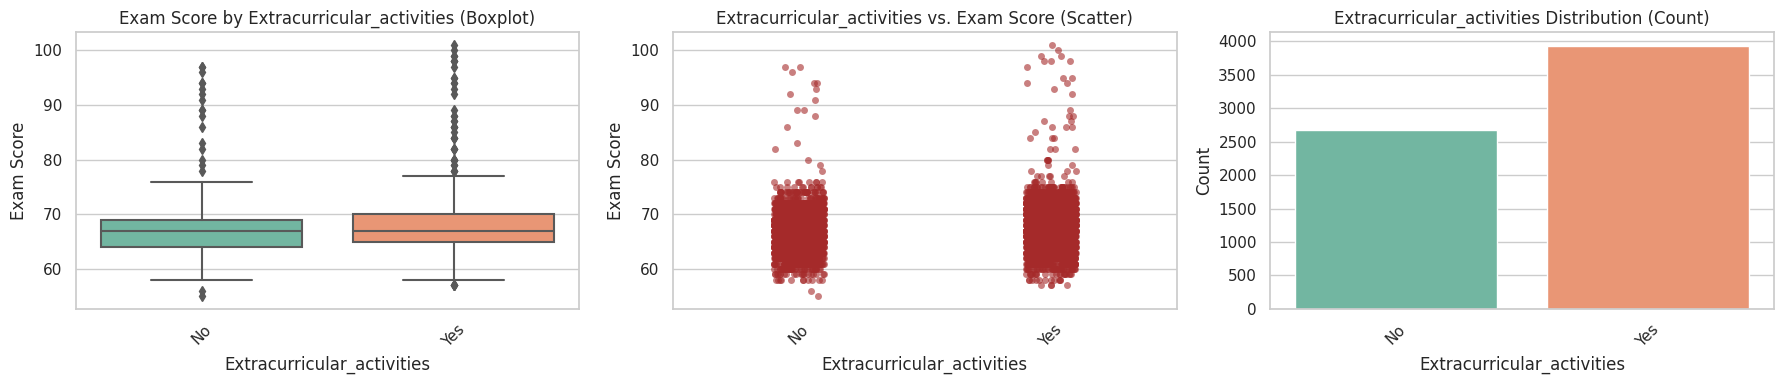

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


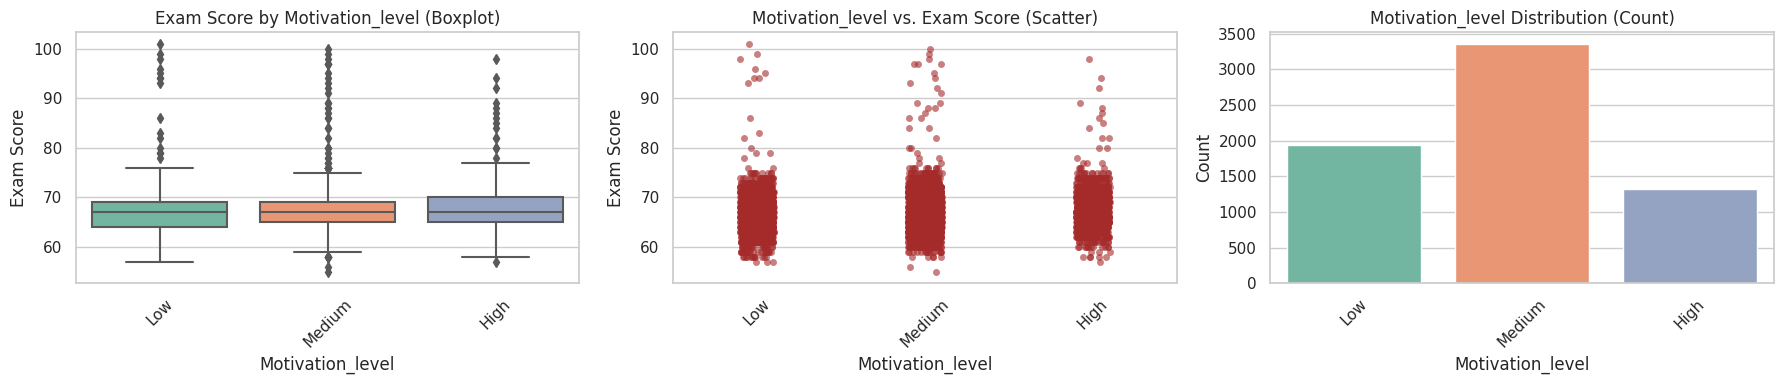

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


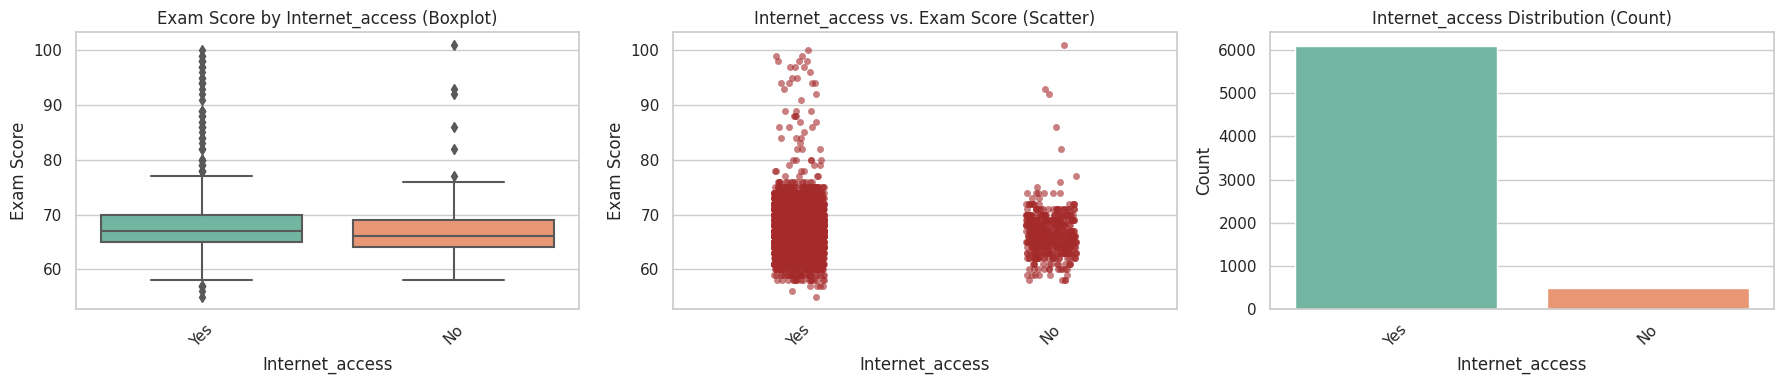

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


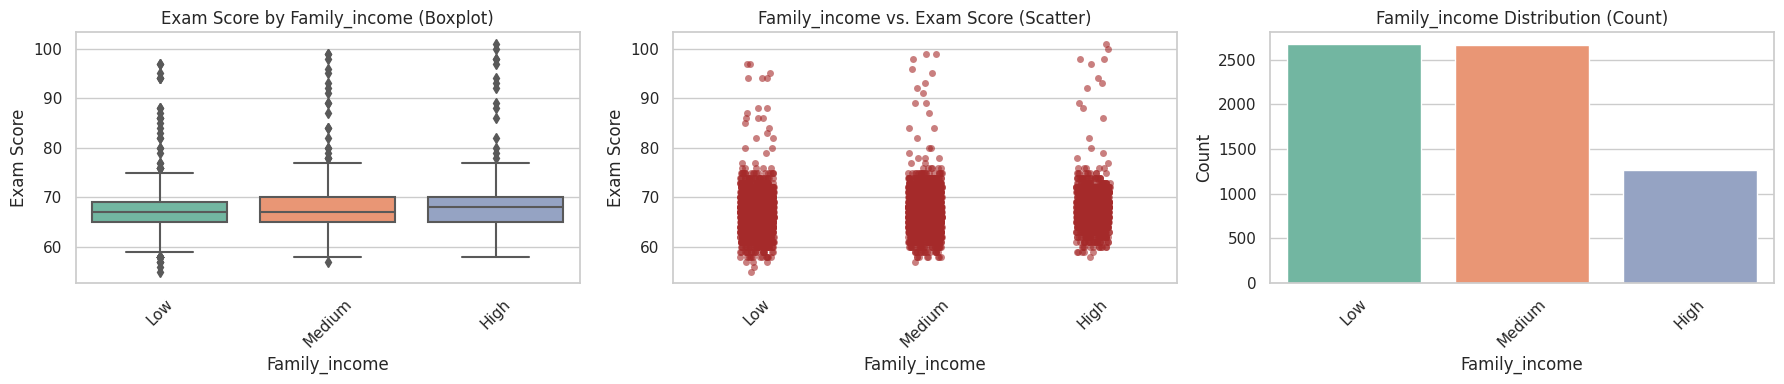

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


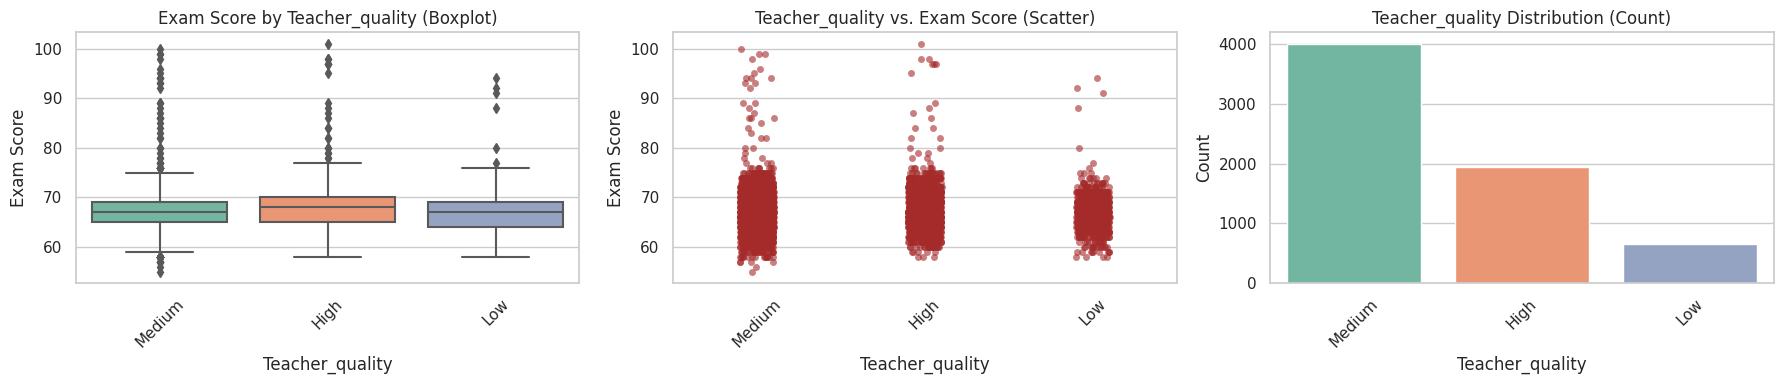

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


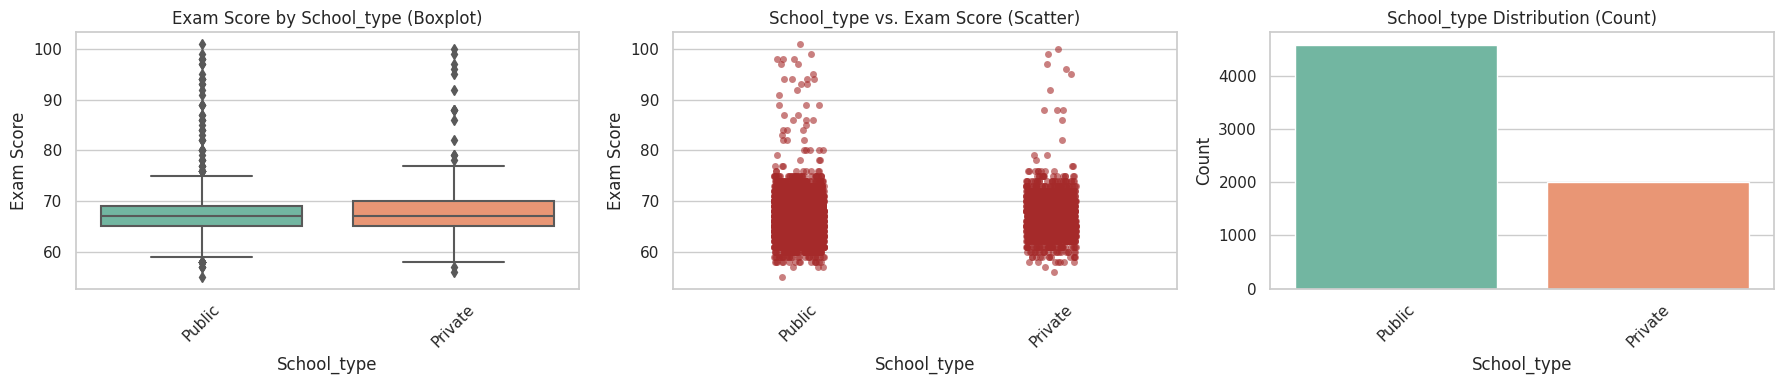

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


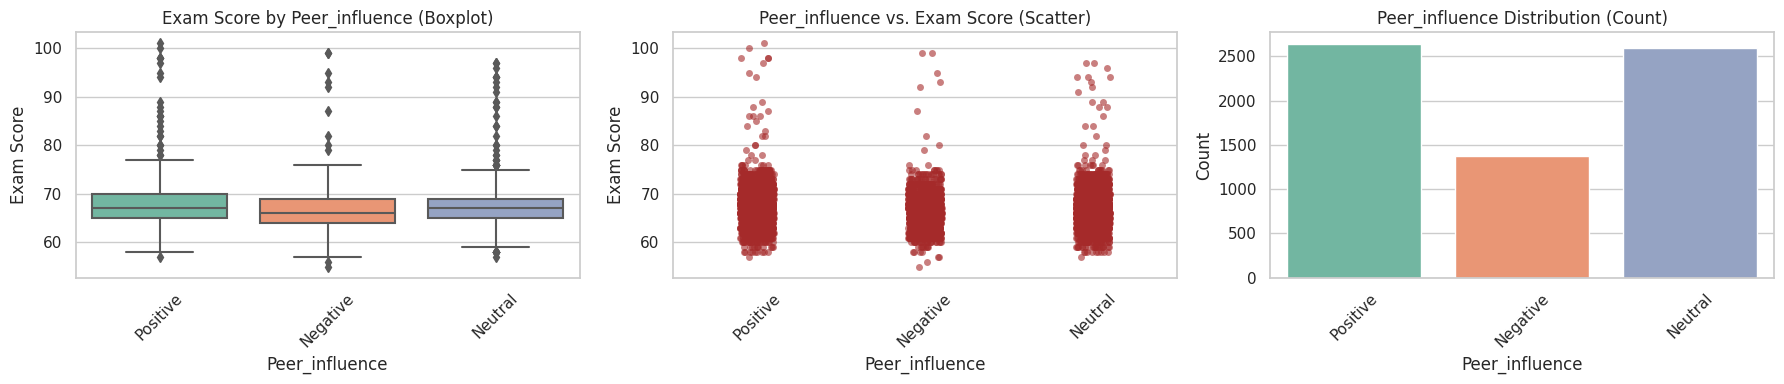

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


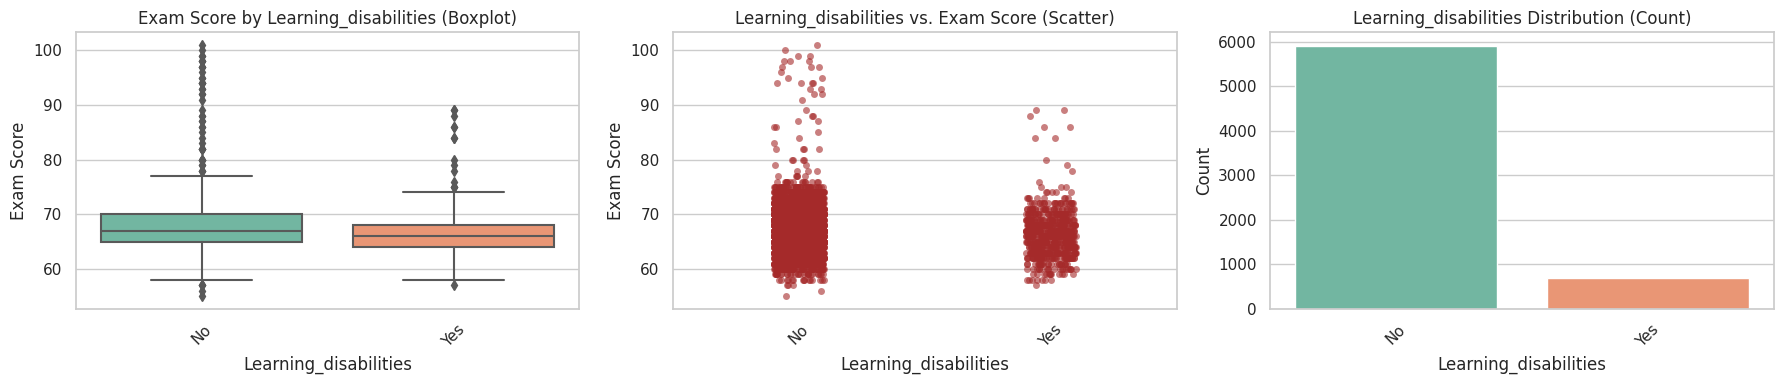

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


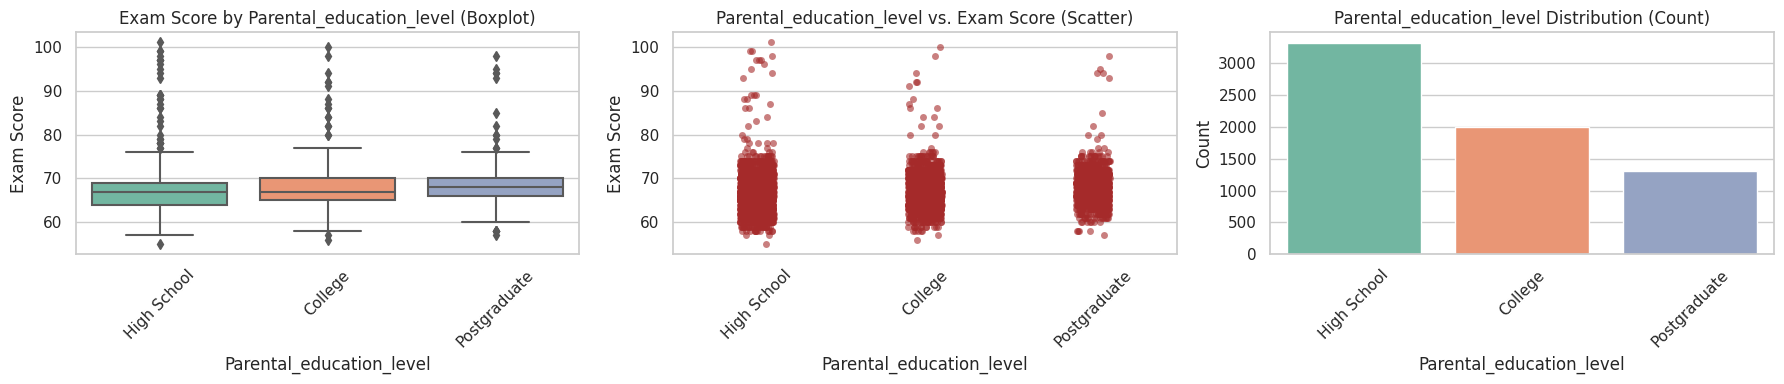

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


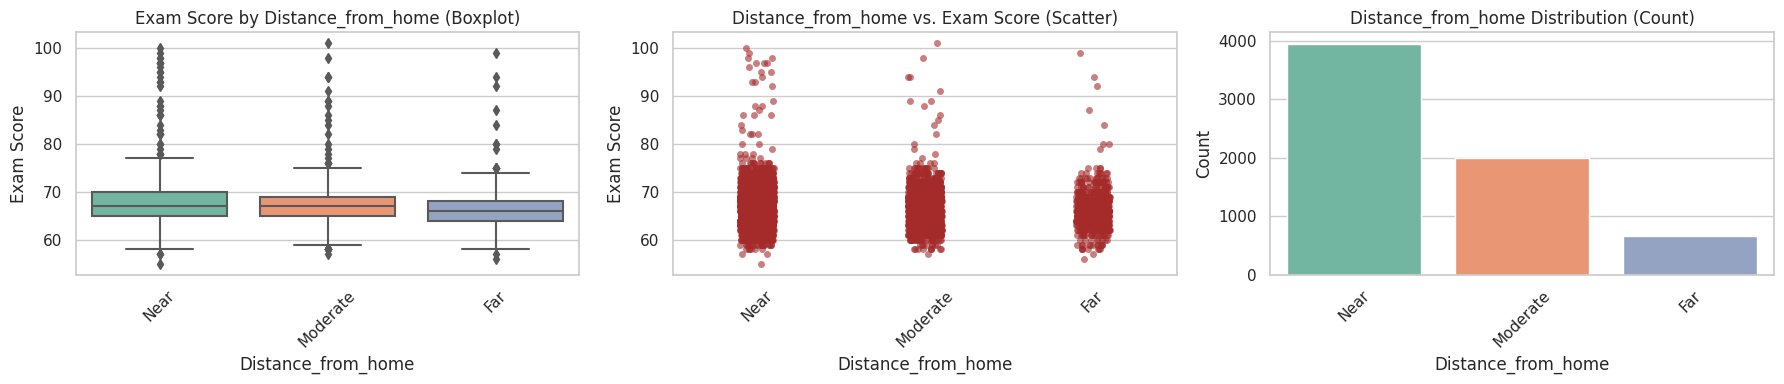

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


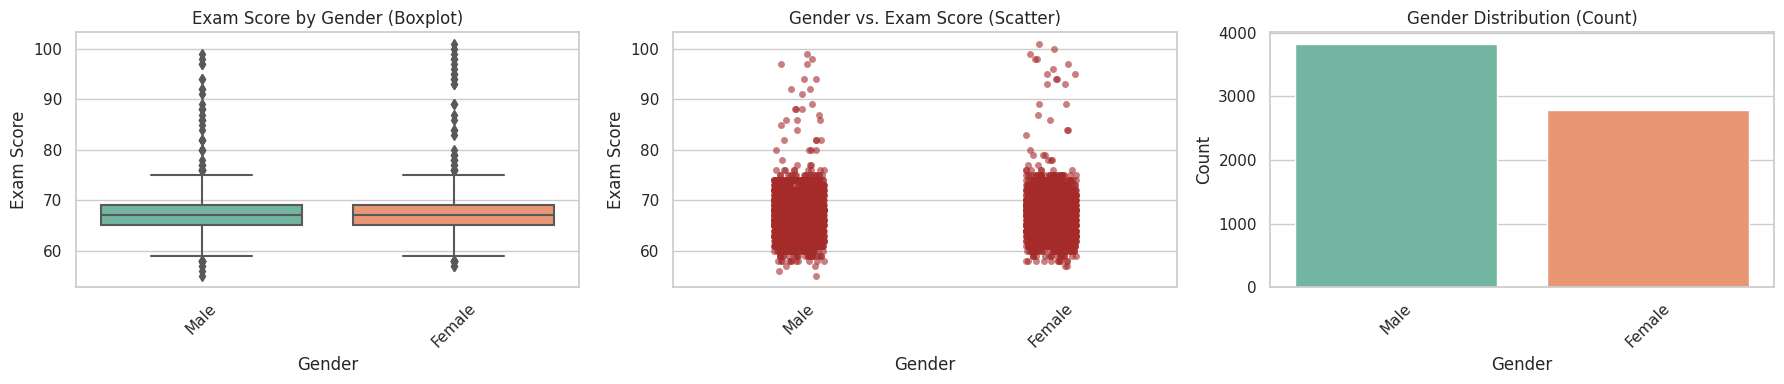

In [28]:
# Plotting categorical features against exam score using subplots

for col in categorical_columns:
    plt.figure(figsize=(18, 4))

    # Boxplot: distribution of exam scores by category
    plt.subplot(1, 3, 1)
    sns.boxplot(x=df[col], y=df['exam_score'], palette='Set2')
    plt.title(f'Exam Score by {col.capitalize()} (Boxplot)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Exam Score')
    plt.xticks(rotation=45)

    # Scatterplot: individual exam scores by category
    plt.subplot(1, 3, 2)
    sns.stripplot(x=df[col], y=df['exam_score'], color='brown', alpha=0.6)
    plt.title(f'{col.capitalize()} vs. Exam Score (Scatter)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Exam Score')
    plt.xticks(rotation=45)

    # Countplot: frequency of each category
    plt.subplot(1, 3, 3)
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'{col.capitalize()} Distribution (Count)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


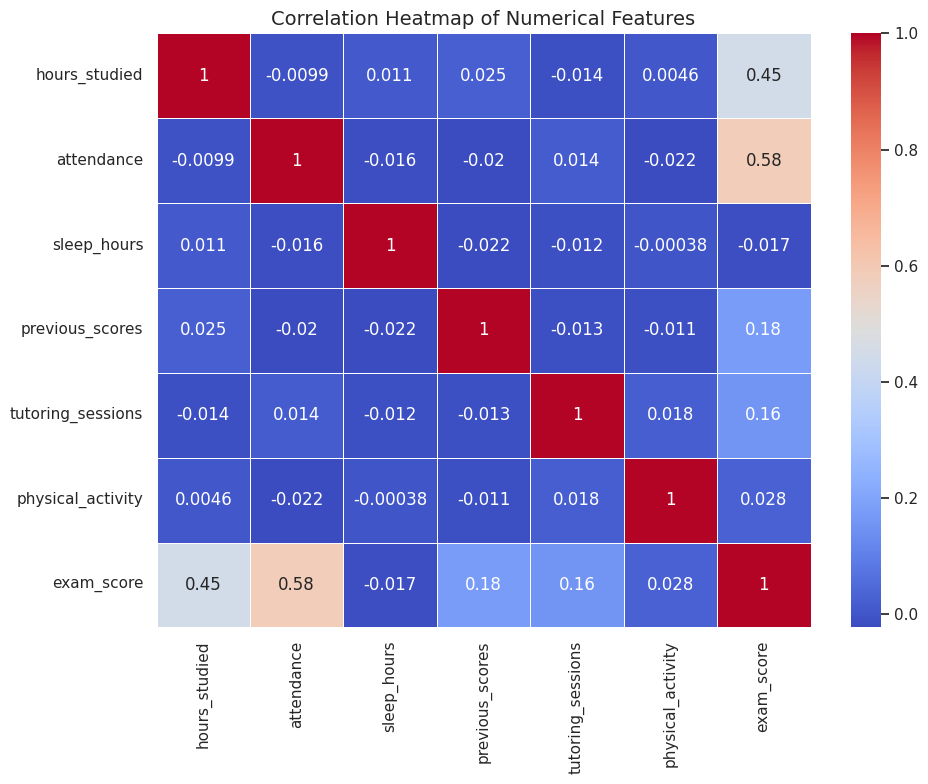

In [29]:
# Select only numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Heatmap showing the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


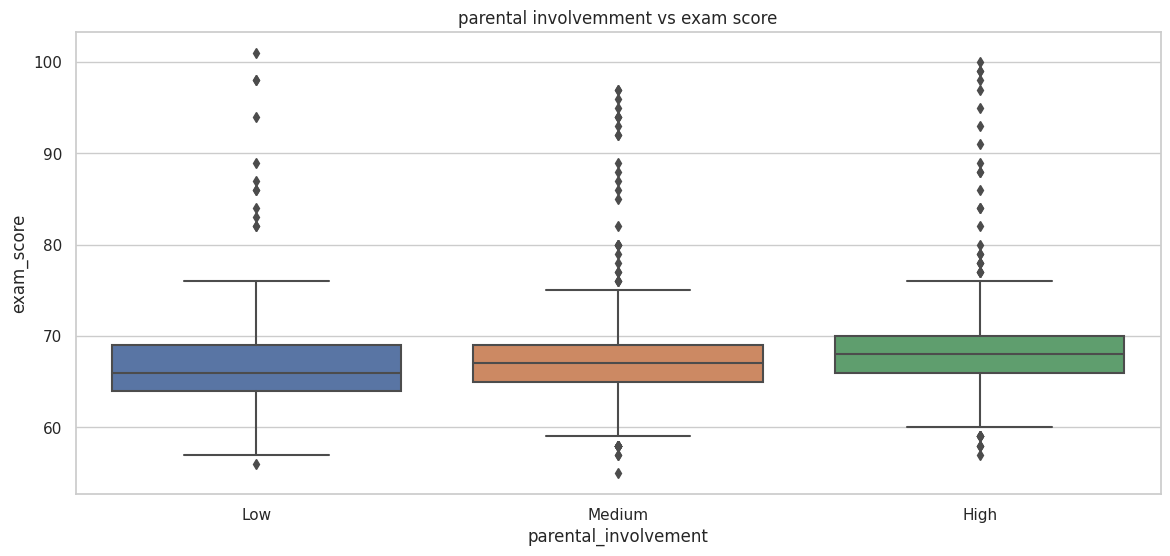

In [30]:
#boxplot showing the relationship between parental involvment and exam score
plt.figure(figsize=(14,6))
sns.boxplot(x= df['parental_involvement'], y= df['exam_score'], data= df)
plt.title('parental involvemment vs exam score')
plt.show()

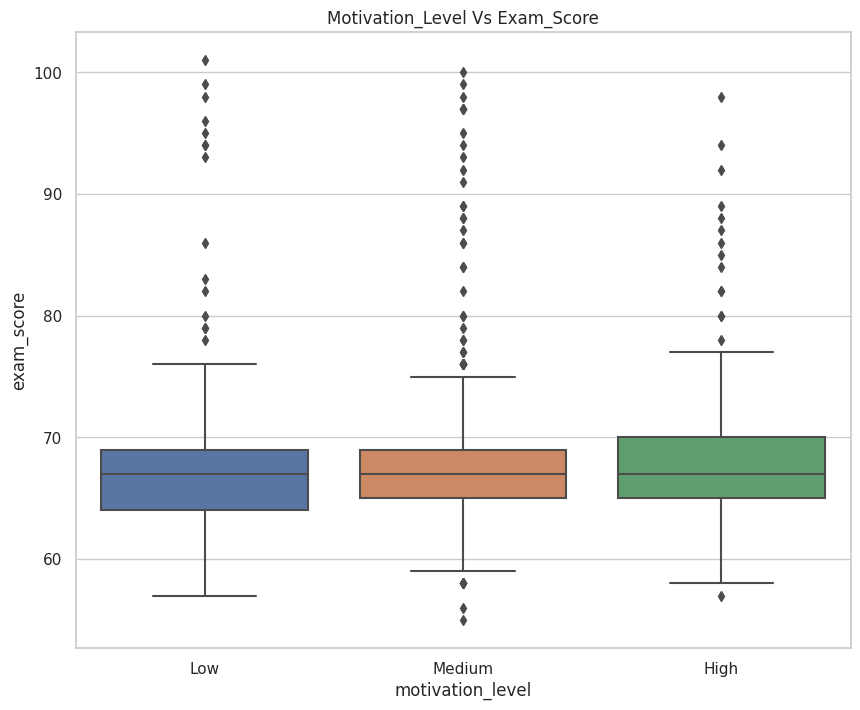

In [31]:
#boxplot showing the relationship between motivational level and exam score
plt.figure(figsize=(10,8))
sns.boxplot(x= df['motivation_level'], y= df['exam_score'], data=df)
plt.title('motivation_level vs exam_score'.title())
plt.show()


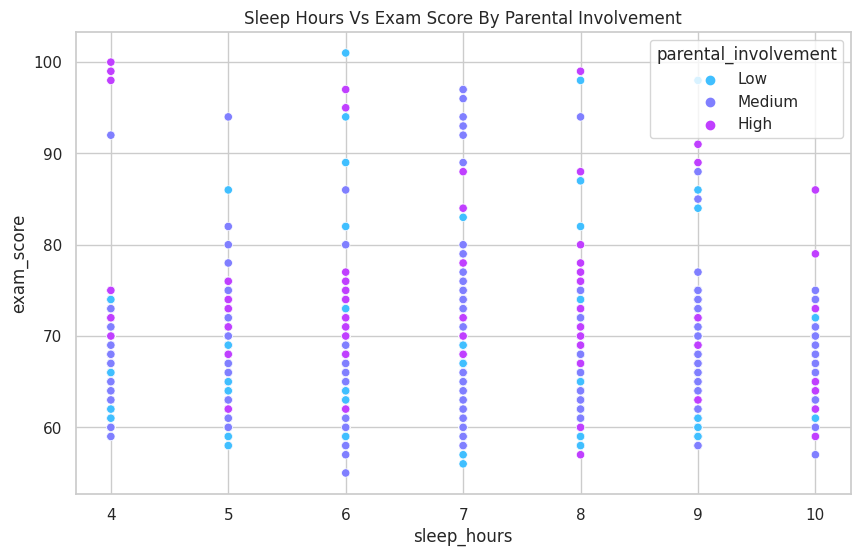

In [32]:
#scatterplotnt showing sleep hours vs exam score categorized by parental involveme
plt.figure(figsize=(10,6))
sns.scatterplot(x='sleep_hours', y='exam_score',hue='parental_involvement', data=df, palette='cool')
plt.title('sleep hours vs exam score by parental involvement'.title())
plt.show()

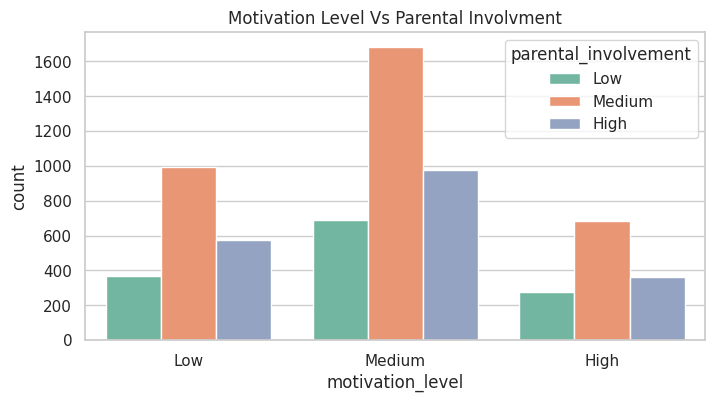

In [33]:
#countplot showing the motivation level and parental involvement distribution:
plt.figure(figsize=(8,4))
sns.countplot(x=df['motivation_level'], hue= df['parental_involvement'], palette='Set2')
plt.title('motivation level vs parental involvment'.title())
plt.show()

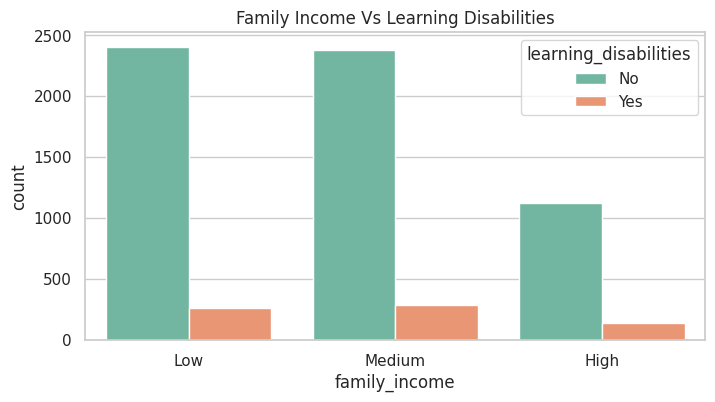

In [34]:
#countplot showing family income distribution by learning disabilities:
plt.figure(figsize=(8,4))
sns.countplot(x= df['family_income'], hue=df['learning_disabilities'], palette='Set2')
plt.title('family income vs learning disabilities'.title())
plt.show;


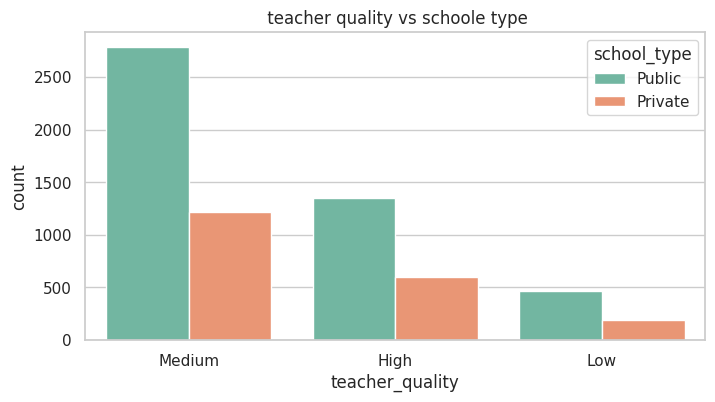

In [35]:
#countplot showing teacher quality distribution by school type:
plt.figure(figsize=(8,4))
sns.countplot(x=df['teacher_quality'], hue=df['school_type'], palette='Set2')
plt.title(' teacher quality vs schoole type')
plt.show();

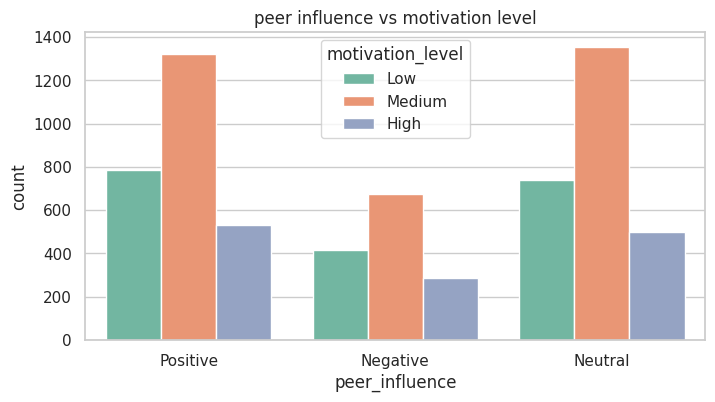

In [36]:
#countplot showing peer infulence distribution by motivation level
plt.figure(figsize=(8,4))
sns.countplot(x= df['peer_influence'], hue= df['motivation_level'], palette='Set2')
plt.title('peer influence vs motivation level')
plt.show()

## 📌 Summary and Key Insights

Through this exploratory analysis, we reached the following conclusions:

- **Exam Score Distribution**: The average score is around 67.2, with most scores tightly clustered around the mean.
- **Gender Differences**: No statistically significant difference was found between male and female exam performance.
- **Study Time Correlation**: A positive relationship exists between hours studied and exam scores, suggesting that effort contributes to performance.
- **Categorical Factors**: Variables like test preparation and parental education show varying degrees of influence on performance.

This EDA highlights how multiple factors combine to shape academic success. The notebook demonstrates a structured, data-driven approach to analyzing educational datasets, useful for both research and decision-making purposes.
